In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0302_MR1_mpr-3_154.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0114_MR1_mpr-1_130.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0150_MR1_mpr-3_129.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0253_MR1_mpr-3_113.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0349_MR1_mpr-4_150.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0045_MR1_mpr-2_102.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0209_MR1_mpr-4_128.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0074_MR1_mpr-4_140.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0330_MR1_mpr-4_112.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0234_MR1_mpr-4_113.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0065_MR1_mpr-3_131.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0207_MR1_mpr-2_106.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0375_MR1_mpr-1_136.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0160_MR1_mpr-4_

In [2]:
import numpy as np 
import os
import keras
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Trying and sampling images as needed. will do 800 images ideally

creating 4 paths for the 4 image categories

In [3]:
path1 = []
path2 = []
path3 = []
path4 = []
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Non Demented'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Mild Dementia'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Moderate Dementia'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Very mild Dementia'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))

Increasing the number of images

In [4]:
path1 = path1[0:488]
path2 = path2[0:488]
path3 = path3[0:488]
path4 = path4[0:488]

In [5]:
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia

OneHotEncoder()

In [6]:
img_1=np.array(Image.open(path1[45]))

In [7]:
img_1.shape

(248, 496, 3)

In [8]:
data = []
result = []
for path in path1:
    img = Image.open(path)
    img = img.resize((256,256))
    img = np.array(img)
    if(img.shape == (256,256,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
for path in path2:
    img = Image.open(path)
    img = img.resize((256,256))
    img = np.array(img)
    if(img.shape == (256,256,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray()) 
        
for path in path3:
    img = Image.open(path)
    img = img.resize((256,256))
    img = np.array(img)
    if(img.shape == (256,256,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())
        
for path in path4:
    img = Image.open(path)
    img = img.resize((256,256))
    img = np.array(img)
    if(img.shape == (256,256,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

Finding the shape of the array as needed

In [9]:
data=np.array(data)
data.shape

(1952, 256, 256, 3)

In [10]:
data.shape[0]

1952

Check if the target label is similar too

In [11]:
result=np.array(result)
result=result.reshape((data.shape[0],4))
result.shape

(1952, 4)

In [12]:
x_train=data
y_train=result

In [13]:
yl_train=encoder.inverse_transform(y_train)

Applying SMOTE and see what happens

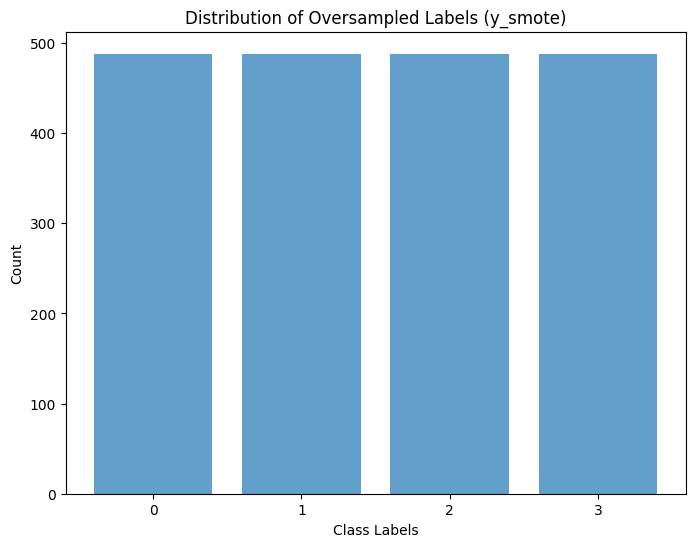

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_smote contains the oversampled labels

# Calculate unique class labels and their counts in y_smote
unique_classes, class_counts = np.unique(yl_train, return_counts=True)

# Plot the distribution of the oversampled labels
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, align='center', alpha=0.7)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Distribution of Oversampled Labels (y_smote)')
plt.xticks(unique_classes)
plt.show()


ADDING VGG16

In [15]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=x_train[0].shape)
base_model.trainable = False ## Not trainable weights

58889256/58889256 [==============================] - 2s 0us/step


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, LeakyReLU

model = Sequential()
model.add(base_model)
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(256, 256, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation
model.add(Conv2D(32, kernel_size=(2, 2), padding='same'))
model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 32)          65568     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 8, 8, 32)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          4128      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 32)          0         
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 32)         128       
 ormalization)                                                   
                                                        

Splitting data

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.15,shuffle=True,random_state=42)

compiling model with early stop too

In [18]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

Fitting model

In [19]:
history = model.fit(x_train,y_train,epochs=100,batch_size=40,verbose=1,validation_data=(x_test,y_test),callbacks=[es])

Epoch 1/100


2023-11-06 20:35:12.913903: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


42/42 [==============================] - 21s 220ms/step - loss: 1.9090 - accuracy: 0.3538 - val_loss: 1.3991 - val_accuracy: 0.2696
Epoch 2/100
42/42 [==============================] - 6s 143ms/step - loss: 1.2064 - accuracy: 0.4870 - val_loss: 1.4820 - val_accuracy: 0.2696
Epoch 3/100
42/42 [==============================] - 6s 142ms/step - loss: 0.9216 - accuracy: 0.5895 - val_loss: 1.7490 - val_accuracy: 0.2696
Epoch 4/100
42/42 [==============================] - 6s 143ms/step - loss: 0.8026 - accuracy: 0.6522 - val_loss: 2.2069 - val_accuracy: 0.2696
Epoch 5/100
42/42 [==============================] - 6s 143ms/step - loss: 0.6530 - accuracy: 0.7251 - val_loss: 2.3797 - val_accuracy: 0.2696
Epoch 6/100
42/42 [==============================] - 6s 143ms/step - loss: 0.5781 - accuracy: 0.7691 - val_loss: 3.0418 - val_accuracy: 0.2696
Epoch 7/100
42/42 [==============================] - 6s 142ms/step - loss: 0.5037 - accuracy: 0.8119 - val_loss: 3.4091 - val_accuracy: 0.2696
Epoch 8/10

heartbroken

Evaluating the model on test data

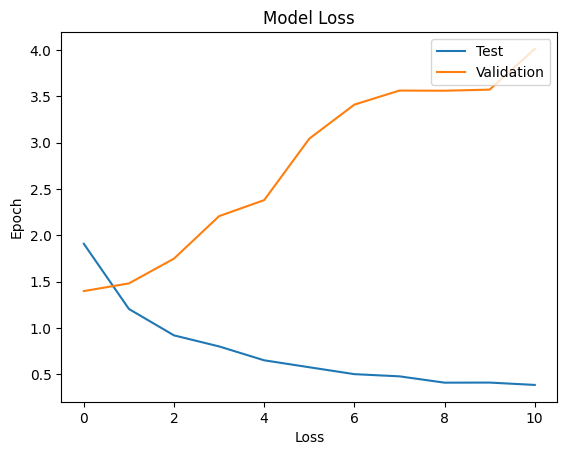

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()